In [239]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [240]:
population_csv_path = "data\WPP2019_TotalPopulationBySex.csv"
population_df = pd.read_csv(population_csv_path)

In [241]:
population_df.head(10)

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
5,4,Afghanistan,2,Medium,1955,1955.5,4318.945,3952.047,8270.992,12.669
6,4,Afghanistan,2,Medium,1956,1956.5,4375.800,4023.073,8398.873,12.865
7,4,Afghanistan,2,Medium,1957,1957.5,4437.157,4098.000,8535.157,13.073
8,4,Afghanistan,2,Medium,1958,1958.5,4503.156,4176.941,8680.097,13.295
9,4,Afghanistan,2,Medium,1959,1959.5,4573.914,4260.033,8833.947,13.531


In [242]:
# How many LocID do we have ?
len(population_df["LocID"].drop_duplicates().values)

477

In [243]:
# How many location do we have ?
len(population_df["Location"].drop_duplicates().values)

474

**Location is different from countries**. The first task is to keep only countries (193 recongnized by the United Nations)

In [244]:
countries_df = pd.read_json('data/countries.json')

In [245]:
countries_df.head(10)

,id,alpha2,alpha3,name
0,4,af,afg,Afghanistan
1,8,al,alb,Albania
2,12,dz,dza,Algeria
3,20,ad,and,Andorra
4,24,ao,ago,Angola
5,28,ag,atg,Antigua and Barbuda
6,32,ar,arg,Argentina
7,51,am,arm,Armenia
8,36,au,aus,Australia
9,40,at,aut,Austria


In [246]:
# Check if all countries are in the population dataset
countries_id = set(countries_df["id"])
locations_id = set(population_df["LocID"])
countries_id - locations_id

set()

In [247]:
# Filter the dataset with only countries remaining
countries_filter = population_df["LocID"].isin(countries_id)
countries_population_df = population_df[countries_filter]

In [248]:
# Check if the filter works as intended
len(countries_population_df["LocID"].drop_duplicates().values)

193

In [249]:
# Keep only Medium Variant
variant_filter = countries_population_df["Variant"] == "Medium"
countries_population_df = countries_population_df[variant_filter]

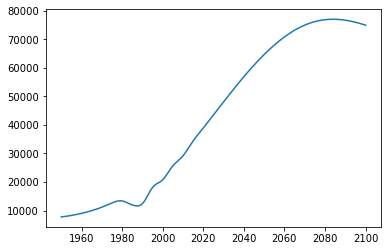

In [250]:
# Vizualise an example with Afghanistan
afghanistan_filter = countries_population_df["Location"] == "Afghanistan"
afghanistan_population = countries_population_df[afghanistan_filter]
plt.plot(afghanistan_population["Time"],afghanistan_population["PopTotal"])

In [251]:
# Agregate all countries to see the world population projection
world_population = countries_population_df.groupby(countries_population_df["Time"]).sum()

In [252]:
world_population.head(10)

,LocID,VarID,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
Time,,,,,,,
1950,83623,386,376446.5,1258822.698,1263033.225,2522034.341,25815.765
1951,83623,386,376639.5,1282589.850,1286452.634,2569222.233,25620.805
1952,83623,386,376832.5,1305987.156,1309438.418,2615607.416,25659.647
1953,83623,386,377025.5,1329358.825,1332350.423,2661893.826,25895.817
1954,83623,386,377218.5,1352987.379,1355482.327,2708657.608,26309.481
1955,83623,386,377411.5,1377093.526,1379061.682,2756346.853,26853.477
1956,83623,386,377604.5,1401833.518,1403247.554,2805276.845,27499.798
1957,83623,386,377797.5,1427302.006,1428132.872,2855634.962,28197.598
1958,83623,386,377990.5,1453538.598,1453752.327,2907495.421,28910.079


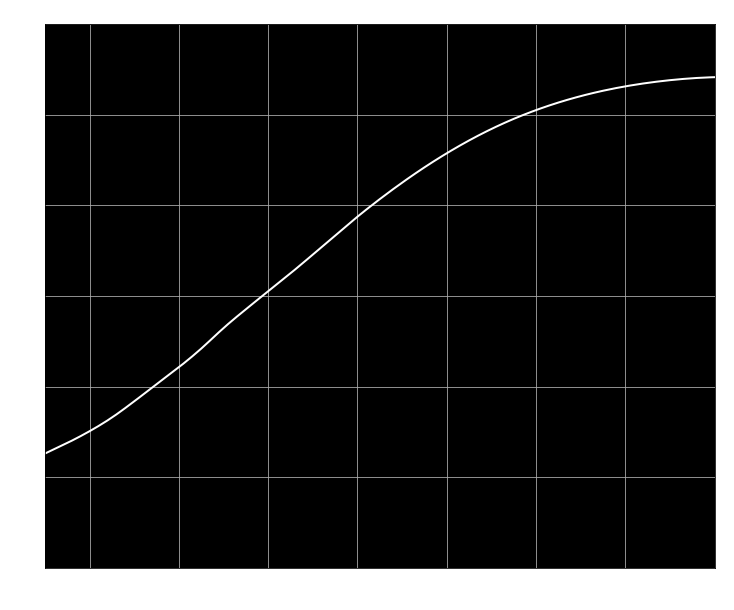

In [253]:
fig, ax = plt.subplots(figsize=(12,10))
plt.grid()
plt.plot(world_population.index,world_population["PopTotal"]/1000000, color="white", linewidth=2)
plt.xlim(1950,2100)
plt.ylim(0,12)
ax.tick_params(colors="white")
ax.patch.set_facecolor('black')
ax.set_xlabel('Year',fontsize=14, color="white")
ax.set_ylabel('Population (billions of people)',fontsize=14, color="white")  # Add a y-label to the axes.
ax.set_title("World Population Projection",fontsize=16, color="white")  # Add a title to the axes.
plt.savefig("figures/world_population_projection")


In [254]:
# We must add the alpha 3 ID for countries to be plotted on the world map
countries_df.columns=["id","alpha2","alpha3","Location"]
countries_df = countries_df.drop(['id',"alpha2"],axis=1)
countries_df['alpha3'] = countries_df['alpha3'].apply(lambda x: x.upper())
countries_df.head(10)

,alpha3,Location
0,AFG,Afghanistan
1,ALB,Albania
2,DZA,Algeria
3,AND,Andorra
4,AGO,Angola
5,ATG,Antigua and Barbuda
6,ARG,Argentina
7,ARM,Armenia
8,AUS,Australia
9,AUT,Austria


In [255]:
countries_population_df = countries_population_df.merge(countries_df,how="inner",on="Location")
countries_population_df.head(10)

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,alpha3
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874,AFG
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009,AFG
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156,AFG
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315,AFG
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486,AFG
5,4,Afghanistan,2,Medium,1955,1955.5,4318.945,3952.047,8270.992,12.669,AFG
6,4,Afghanistan,2,Medium,1956,1956.5,4375.800,4023.073,8398.873,12.865,AFG
7,4,Afghanistan,2,Medium,1957,1957.5,4437.157,4098.000,8535.157,13.073,AFG
8,4,Afghanistan,2,Medium,1958,1958.5,4503.156,4176.941,8680.097,13.295,AFG
9,4,Afghanistan,2,Medium,1959,1959.5,4573.914,4260.033,8833.947,13.531,AFG


In [256]:
countries_population_df["alpha3"].drop_duplicates().isna().drop_duplicates()

0    False
Name: alpha3, dtype: bool

In [257]:
countries_population_df.iloc[[6644]]

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,alpha3
6644,208,Denmark,2,Medium,1950,1950.5,2117.133,2151.148,4268.281,100.596,DNK


In [258]:
countries_population_df[countries_population_df["Location"]=="Côte d'Ivoire"]

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,alpha3


In [259]:
countries_population_df.fillna(value="CIV")

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,alpha3
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874,AFG
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009,AFG
2,4,Afghanistan,2,Medium,1952,1952.5,4174.45,3761.546,7935.996,12.156,AFG
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315,AFG
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486,AFG
...,...,...,...,...,...,...,...,...,...,...,...
27930,716,Zimbabwe,2,Medium,2096,2096.5,15008.463,15932.316,30940.779,79.981,ZWE
27931,716,Zimbabwe,2,Medium,2097,2097.5,15008.822,15943.386,30952.208,80.011,ZWE
27932,716,Zimbabwe,2,Medium,2098,2098.5,15007.57,15952.241,30959.811,80.031,ZWE
27933,716,Zimbabwe,2,Medium,2099,2099.5,15004.963,15959.089,30964.052,80.041,ZWE


In [260]:
# We can vizualise world population in the world map using choropleth
fig = px.choropleth(countries_population_df, locations='alpha3', color='PopTotal', hover_name='Location',
                    title = "World Population Evolution/Projection from 1950 to 2100",
                    labels=dict(PopTotal="Population"),
                    animation_frame="Time", projection='natural earth',
                    color_continuous_scale=px.colors.sequential.Turbo,
                    template='plotly_dark')
fig.show()
fig.write_html("figures/gdp_per_country.html")